# scaredyrat-ext analyzes data from extinction protocol

In [1]:
# notebook formatting and loading settings, imports - keep same

%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
import os, sys

sys.path.append('../src')
import scaredyrattools as sr

# Change variables in this cell:

In [2]:
## Be sure to put r before the path
## Easiest to go to correct folder, then copy/paste its path

# note to self - just change week number every time? i think?
# need to modify for easy use on non-unix
inpath = '/Users/liannj/Documents/Anna/eCBData/Week10/3Ext'

## Make sure the folder exists already.
## The file does not need to exist; it will be created.
outpath = '/Users/liannj/Documents/Anna/eCBData/OutputWeek10'

filelist = ['Raw data-eCB Fear Conditioning Spring 2018-Trial   160.xlsx',
           'Raw data-eCB Fear Conditioning Spring 2018-Trial   161.xlsx',
           'Raw data-eCB Fear Conditioning Spring 2018-Trial   162.xlsx']

sheetlist = ['Track-Arena 1-Subject 1', 'Track-Arena 2-Subject 1', 
             'Track-Arena 3-Subject 1', 'Track-Arena 4-Subject 1']

# Function calls below

Raw data-eCB Fear Conditioning Spring 2018-Trial   160.xlsx Track-Arena 1-Subject 1 is EF53 in Extinction


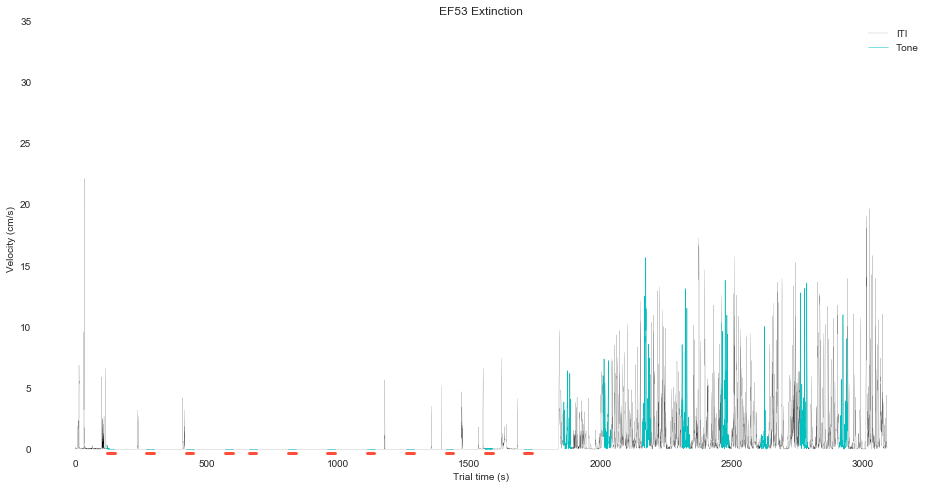

Raw data-eCB Fear Conditioning Spring 2018-Trial   160.xlsx Track-Arena 2-Subject 1 is EF54 in Extinction


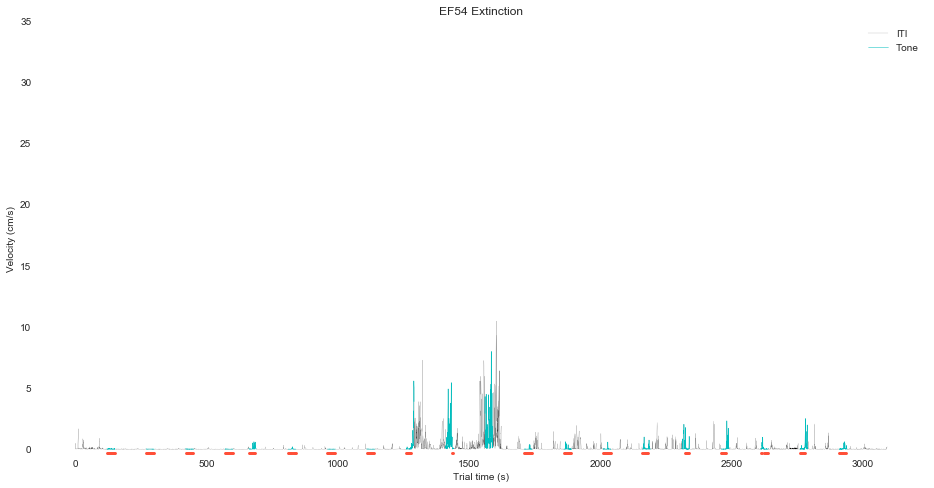

Raw data-eCB Fear Conditioning Spring 2018-Trial   160.xlsx Track-Arena 3-Subject 1 is EF55 in Extinction


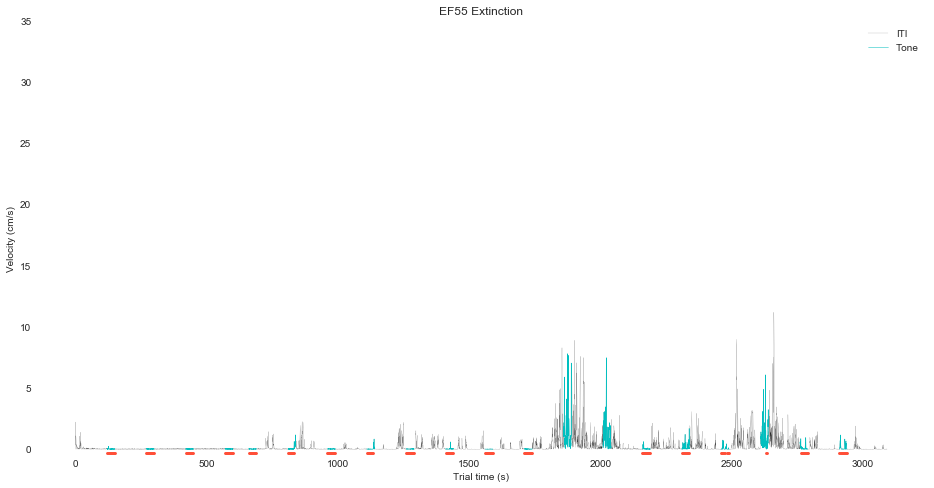

Raw data-eCB Fear Conditioning Spring 2018-Trial   160.xlsx Track-Arena 4-Subject 1 is EF56 in Extinction


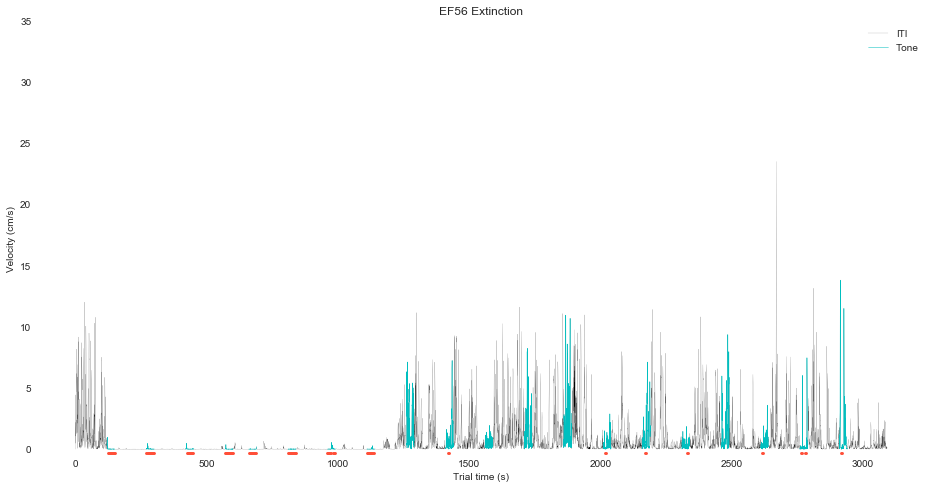

Raw data-eCB Fear Conditioning Spring 2018-Trial   161.xlsx Track-Arena 1-Subject 1 is EM57 in Extinction


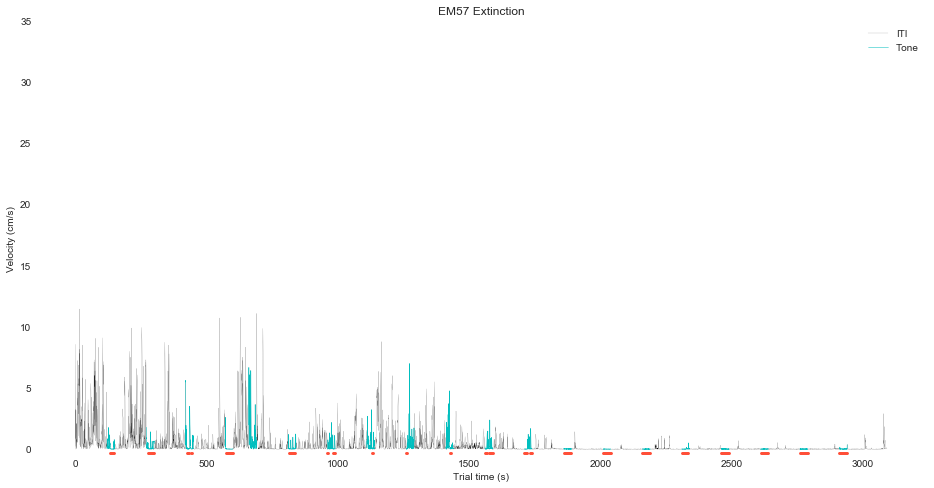

Raw data-eCB Fear Conditioning Spring 2018-Trial   161.xlsx Track-Arena 2-Subject 1 is EM58 in Extinction


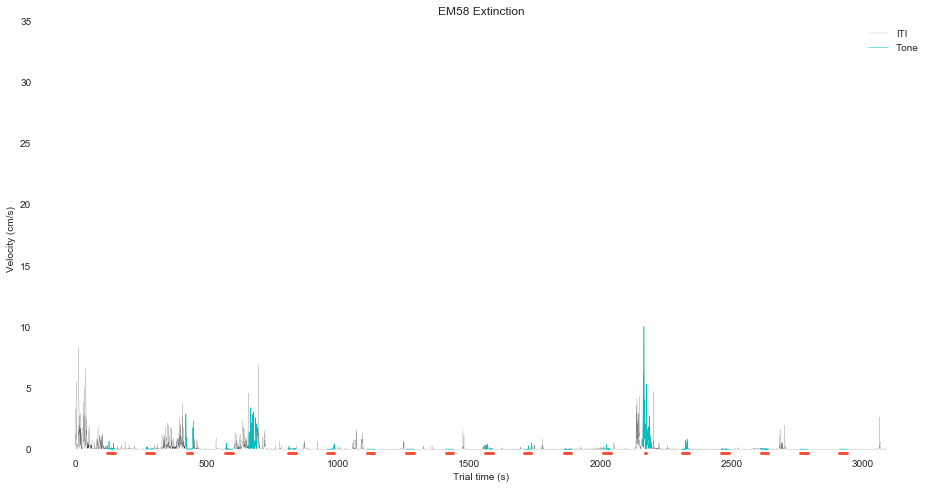

Raw data-eCB Fear Conditioning Spring 2018-Trial   161.xlsx Track-Arena 3-Subject 1 is EM59 in Extinction


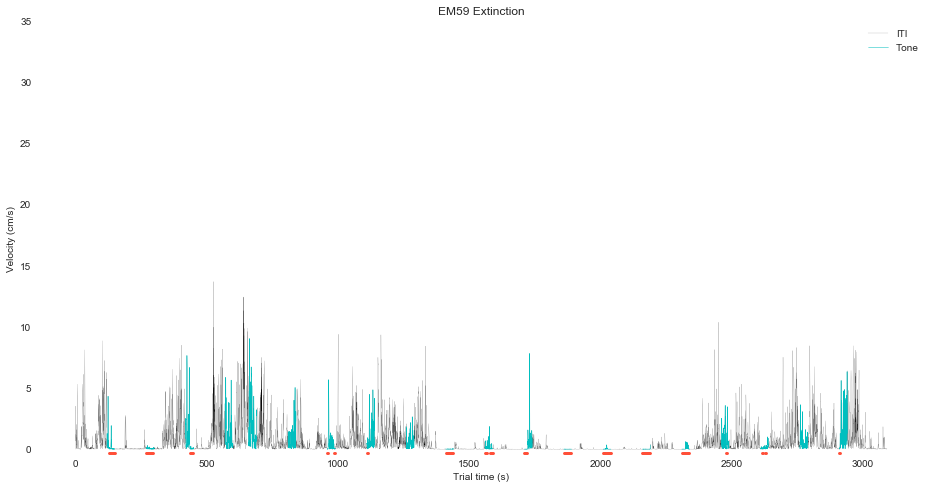

Raw data-eCB Fear Conditioning Spring 2018-Trial   161.xlsx Track-Arena 4-Subject 1 is EM60 in Extinction


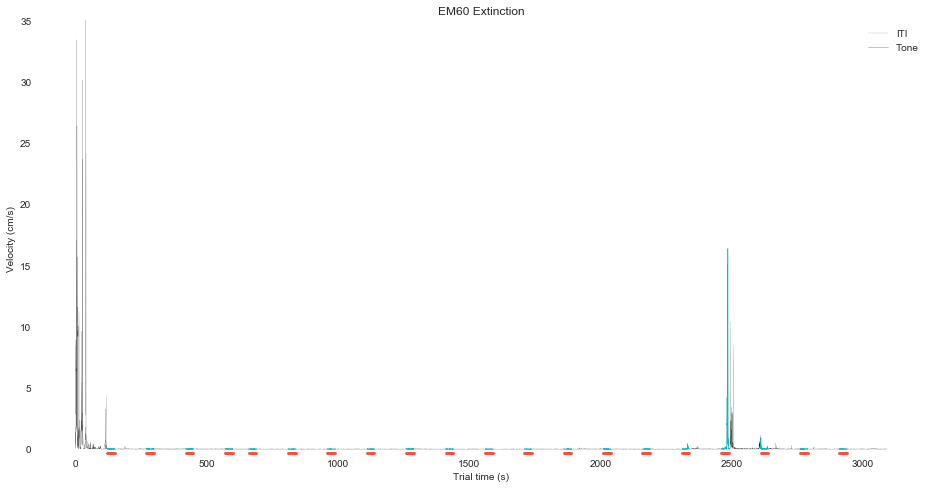

Raw data-eCB Fear Conditioning Spring 2018-Trial   162.xlsx Track-Arena 1-Subject 1 is EF57 in Extinction


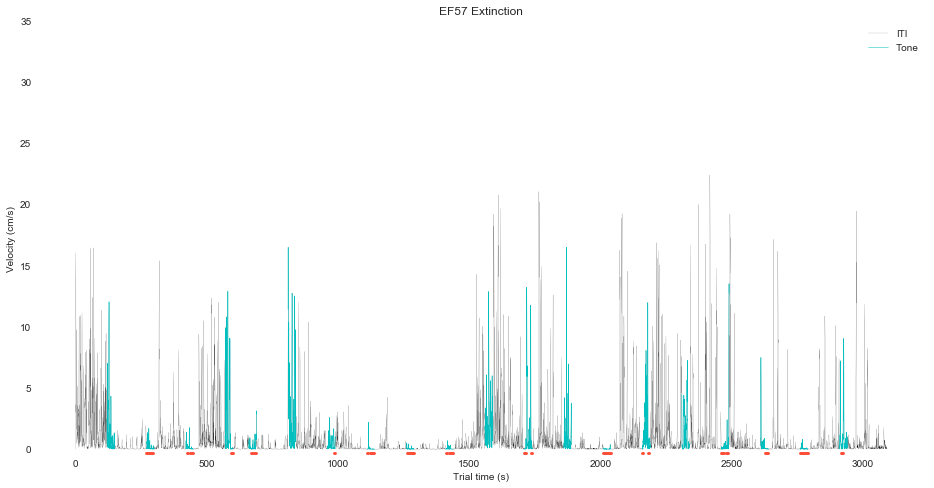

Raw data-eCB Fear Conditioning Spring 2018-Trial   162.xlsx Track-Arena 2-Subject 1 is EF58 in Extinction


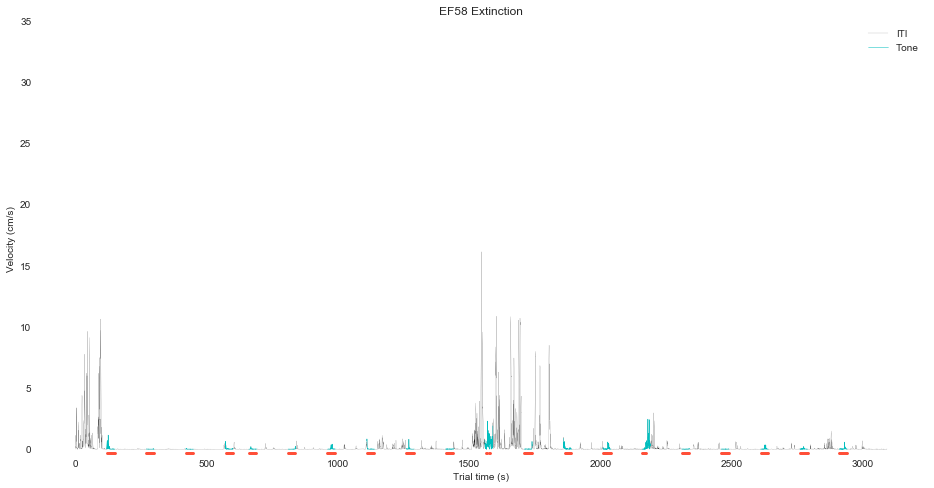

Raw data-eCB Fear Conditioning Spring 2018-Trial   162.xlsx Track-Arena 3-Subject 1 is EF59 in Extinction


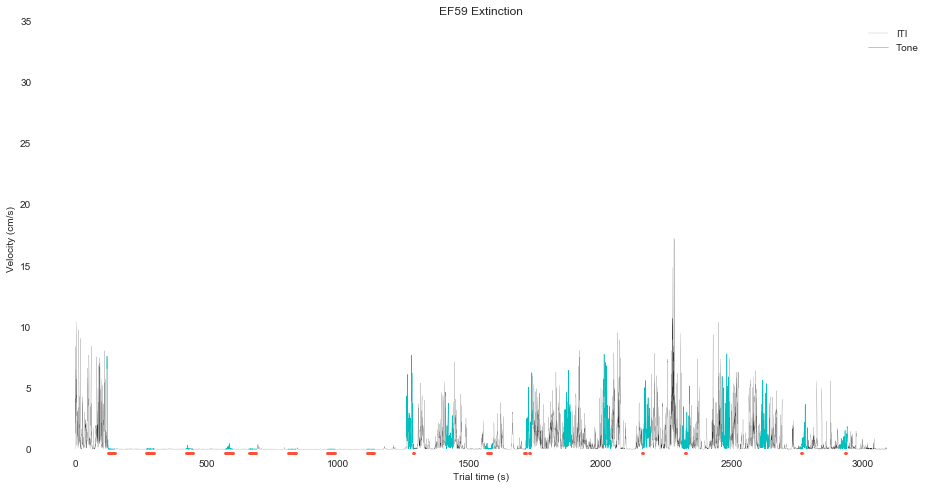

Raw data-eCB Fear Conditioning Spring 2018-Trial   162.xlsx Track-Arena 4-Subject 1 is EF60 in Extinction


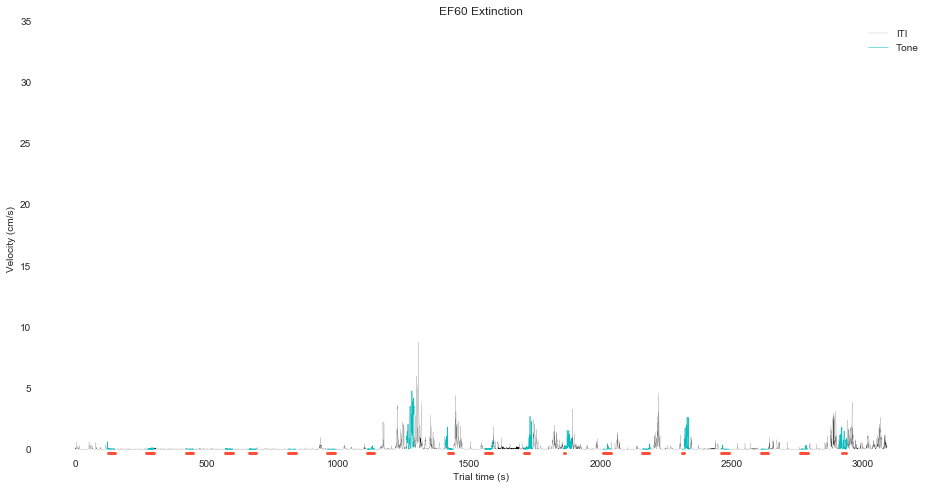

In [3]:
for file in filelist:
    for sheet in sheetlist:

        ## set number of tones and input/output info
        ntones = 20
        ID,ctx,anim = sr.animal_read(inpath,file,sheet)

        ## use scaredyrattools function to find where each epoch is
        tones = sr.find_tones(anim, ntones)
        pretones = sr.find_pretones(anim, ntones)
        shocks = sr.find_shock_responses(anim, ntones)
        pshocks = sr.find_postshocks(anim, ntones)

        ## use scaredyrattools function to find top n velocities
        mtone = sr.get_top_vels(tones,10,ntones)
        mptone = sr.get_top_vels(pretones,10,ntones)
        mshock = sr.get_top_vels(shocks,5,ntones)
        mpshock = sr.get_top_vels(pshocks,10,ntones)

        ## define names of CSV files to save to
        mToneOutfile = outpath + '/ext-tone-max-vels-{}.csv' 
        mToneOutfile = mToneOutfile.format(ID)

        mPToneOutfile = outpath + '/ext-pretone-max-vels-{}.csv' 
        mPToneOutfile = mPToneOutfile.format(ID)

        mShockOutfile = outpath + '/ext-shock-max-vels-{}.csv' 
        mShockOutfile = mShockOutfile.format(ID)

        mPShockOutfile = outpath + '/ext-postshock-max-vels-{}.csv' 
        mPShockOutfile = mPShockOutfile.format(ID)

        ## send files to previously defined CSVs
        mtone.to_csv(mToneOutfile)
        mptone.to_csv(mPToneOutfile)
        mshock.to_csv(mShockOutfile)
        mpshock.to_csv(mPShockOutfile)

        ## use scaredyrattools function to find means
        tmeans = sr.get_means(tones,'Tone',ntones)
        ptmeans = sr.get_means(pretones,'Pre-tone',ntones)
        smeans = sr.get_means(shocks,'Shock',ntones)
        pshockmeans = sr.get_means(pshocks,'Post-shock',ntones)
        allmeans = pd.concat([tmeans, ptmeans, smeans, pshockmeans],axis=1)

        ## use scaredyrattools function to find SEMs
        tSEMs = sr.get_SEMs(tones,'Tone',ntones)
        ptSEMs = sr.get_SEMs(pretones,'Pre-tone',ntones)
        sSEMs = sr.get_SEMs(shocks,'Shock',ntones)
        pshockSEMs = sr.get_SEMs(pshocks,'Post-shock',ntones)
        allSEMs = pd.concat([tSEMs, ptSEMs, sSEMs, pshockSEMs],axis=1)

        ## use scaredyrattools function to find medians
        tmeds = sr.get_meds(tones,'Tone',ntones)
        ptmeds = sr.get_meds(pretones,'Pre-tone',ntones)
        smeds = sr.get_meds(shocks,'Shock',ntones)
        pshockmeds = sr.get_meds(pshocks,'Post-shock',ntones)
        allmeds = pd.concat([tmeds, ptmeds, smeds, pshockmeds],axis=1)

        ## define names of CSV files to save to
        meanOutfile = outpath + '/ext-mean-{}.csv' 
        meanOutfile = meanOutfile.format(ID)

        SEMOutfile = outpath + '/ext-SEM-{}.csv' 
        SEMOutfile = SEMOutfile.format(ID)

        medOutfile = outpath + '/ext-med-{}.csv' 
        medOutfile = medOutfile.format(ID)

        allmeans.to_csv(meanOutfile)
        allSEMs.to_csv(SEMOutfile)
        allmeds.to_csv(medOutfile)
        
        ## sr tools to find freezing
        toneFreezing, FTs = sr.get_freezing(tones,ntones,freezingThreshold=0.1, binSecs=1)
        ptFreezing, ptFTs = sr.get_freezing(pretones,ntones,freezingThreshold=0.1, binSecs=1)
        shockFreezing, shockFTs = sr.get_freezing(shocks,ntones,freezingThreshold=0.1, binSecs=1)
        pshockFreezing, pshockFTs = sr.get_freezing(pshocks,ntones,freezingThreshold=0.1, binSecs=1)

        allFreezing = pd.concat([toneFreezing, ptFreezing, shockFreezing, pshockFreezing],axis=1)
        
        ## exporting
        freezingOutfile = outpath + '/ext-freezing-{}.csv'
        freezingOutfile = freezingOutfile.format(ID)
        
        allFreezing.to_csv(freezingOutfile)
        
        ## plot stuff
        vels = pd.DataFrame(anim['Velocity'])

        plt.style.use('seaborn-white')
        plt.figure(figsize=(16,8),facecolor='white',edgecolor='white')

        # Plots main velocity in black
        line1, = plt.plot(vels,color='k',linewidth=0.1,label='ITI')

        # Loops through tones, plots each one in cyan
        i = 1
        while i <= ntones:
            tone = sr.find_tone_vels(anim,i)
            line2, = plt.plot(tone,color='c',linewidth=0.5,label='Tone')
            i += 1
        
        for timebin in FTs:
            plt.plot([timebin[0],timebin[1]],[-0.3,-0.3],color='#ff4f38',linewidth=3)

        plt.ylim(-0.5,35)

        sns.despine(left=True, bottom=True, right=True)
        plt.title(ID + " Extinction")
        plt.legend(handles=[line1,line2])
        plt.ylabel('Velocity (cm/s)')
        plt.xlabel('Trial time (s)')

        ## define where to save the fig
        fname = outpath + '/Compressed/ext-plot-{}'
        fname = fname.format(ID)

        plt.savefig(fname, dpi=300)

        plt.show()
        plt.close()